In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

###  data handling (mean, std), images loaded in range [0,1] normalize to [-1, 1]

In [3]:
# 1.
transform = transforms.Compose([transforms.ToTensor(),
								transforms.Normalize((.5, .5, .5), (.5, .5, .5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
										download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
										download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
										  shuffle=True)

testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
										 shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
		   'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
def imshow(img):
	img = img / 2 + 0.5 	# unnormalize
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.show()

In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

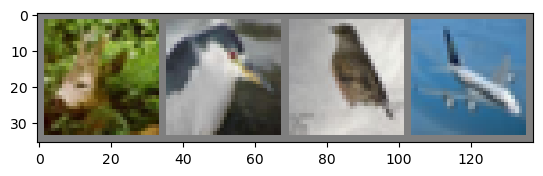

deer  bird  bird  plane


In [6]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### define model

In [9]:
class Net(nn.Module):
	def __init__(self):
		super().__init__()
		# channels in, channels out, kernel size
		self.conv1 = nn.Conv2d(3, 6, 5)
		self.pool = nn.MaxPool2d(2, 2)
		self.conv2 = nn.Conv2d(6, 16, 5)
		self.fc1 = nn.Linear(16 * 5 * 5, 120)
		self.fc2 = nn.Linear(120, 84)
		self.fc3 = nn.Linear(84, 10)

	def forward(self, x):
		x = self.pool(F.relu(self.conv1(x)))
		x = self.pool(F.relu(self.conv2(x)))
		x = torch.flatten(x, 1)		# flatten all except batch
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = self.fc3(x)
		return x

net = Net()

### define loss and optimizer

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### train model

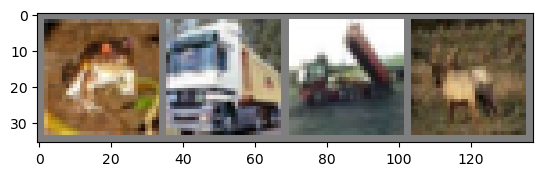

GroundTruth:  frog  truck truck deer 


In [24]:
PATH = './cifar_net.pth'
run_train = False
if run_train:
	for epoch in range(2):		# loop over dataset multiple times

		running_loss = 0.0
		for i, data in enumerate(trainloader, 0):
			inputs, labels = data

			optimizer.zero_grad()

			outputs = net(inputs)

			loss = criterion(outputs, labels)
			loss.backward()
			optimizer.step()

			running_loss += loss.item()
			if i % 2000 == 1999:
				print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
				running_loss = 0.0

	print('Finished Training')

	torch.save(net.state_dict(), PATH)


dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [26]:
# net = Net()
# net.load_state_dict(torch.load(PATH))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  truck truck truck truck
